## Loading in the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
from copy import deepcopy

data=pd.read_csv("C:\\Users\\aayus\\Downloads\\genres_v2.csv",low_memory=False)

In [3]:
data.head(10)

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   
5         0.721   0.568    0   -11.295     1       0.4140        0.0452   
6         0.718   0.668    8    -4.162     1       0.1370        0.0254   
7         0.694   0.711    8    -5.525     1       0.2210        0.0397   
8         0.774   0.751    1    -2.445     1       0.1980        0.0614   
9         0.893   0.907   11   -10.406     1       0.3670        0.1520   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   
5          0.212000    0.1280   0.1090  ...  6fsypiJHyWmeINsOLC1cos   
6          0.007800    0.1240   0.0380  ...  0XfQbq7DaMOmVXgQ71eA6E   
7          0.000000    0.1120   0.2830  ...  0LLeuNBWPOg3XA73yab3PT   
8          0.000000    0.0728   0.1890  ...  37gqBnUAZe8BY8WR56kDNk   
9          0.031100    0.5580   0.3020  ...  2ggqfj97qyiORmXoVFzP5j   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4  spotify:track:4jCeguq9rMTlbMmPHuO7S3   
5  spotify:track:6fsypiJHyWmeINsOLC1cos   
6  spotify:track:0XfQbq7DaMOmVXgQ71eA6E   
7  spotify:track:0LLeuNBWPOg3XA73yab3PT   
8  spotify:track:37gqBnUAZe8BY8WR56kDNk   
9  spotify:track:2ggqfj97qyiORmXoVFzP5j   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2  https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3  https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4  https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   
5  https://api.spotify.com/v1/tracks/6fsypiJHyWme...   
6  https://api.spotify.com/v1/tracks/0XfQbq7DaMOm...   
7  https://api.spotify.com/v1/tracks/0LLeuNBWPOg3...   
8  https://api.spotify.com/v1/tracks/37gqBnUAZe8B...   
9  https://api.spotify.com/v1/tracks/2ggqfj97qyiO...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1  https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2  https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3  https://api.spotify.com/v1/audio-analysis/0VSX...      123661   
4  https://api.spotify.com/v1/audio-analysis/4jCe...      123298   
5  https://api.spotify.com/v1/audio-analysis/6fsy...      112511   
6  https://api.spotify.com/v1/audio-analysis/0XfQ...       77584   
7  https://api.spotify.com/v1/audio-analysis/0LLe...      127524   
8  https://api.spotify.com/v1/audio-analysis/37gq...      140326   
9  https://api.spotify.com/v1/audio-analysis/2ggq...      121979   

  time_signature      genre                                      song_name  \
0              4  Dark Trap                            Mercury: Retrograde   
1              4  Dark Trap                                      Pathology   
2              4  Dark Trap                                       Symbiote   
3              3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)   
4              4  Dark Trap                                          Venom   
5              4  Dark Trap                                        Gatteka   
6        

## Let's have a superficial look at the main characteristics and patterns of our data

In [4]:
data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [5]:
data.describe()

danceability        energy           key      loudness          mode  \
count  42305.000000  42305.000000  42305.000000  42305.000000  42305.000000   
mean       0.639364      0.762516      5.370240     -6.465442      0.549462   
std        0.156617      0.183823      3.666145      2.941165      0.497553   
min        0.065100      0.000243      0.000000    -33.357000      0.000000   
25%        0.524000      0.632000      1.000000     -8.161000      0.000000   
50%        0.646000      0.803000      6.000000     -6.234000      1.000000   
75%        0.766000      0.923000      9.000000     -4.513000      1.000000   
max        0.988000      1.000000     11.000000      3.148000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  42305.000000  42305.000000      42305.000000  42305.000000   
mean       0.136561      0.096160          0.283048      0.214079   
std        0.126168      0.170827          0.370791      0.175576   
min        0.022700      0.000001          0.000000      0.010700   
25%        0.049100      0.001730          0.000000      0.099600   
50%        0.075500      0.016400          0.005940      0.135000   
75%        0.193000      0.107000          0.722000      0.294000   
max        0.946000      0.988000          0.989000      0.988000   

            valence         tempo    duration_ms  time_signature    Unnamed: 0  
count  42305.000000  42305.000000   42305.000000    42305.000000  20780.000000  
mean       0.357101    147.474056  250865.846685        3.972580  10483.970645  
std        0.233200     23.844623  102957.713571        0.268342   6052.359519  
min        0.018700     57.967000   25600.000000        1.000000      0.000000  
25%        0.161000    129.931000  179840.000000        4.000000   5255.750000  
50%        0.322000    144.973000  224760.000000        4.000000  10479.500000  
75%        0.522000    161.464000  301133.000000        4.000000  15709.250000  
max        0.988000    220.290000  913052.000000        5.000000  20999.000000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

<AxesSubplot:>

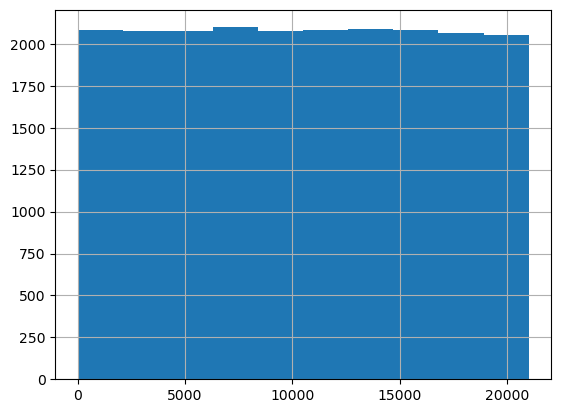

In [7]:
data["Unnamed: 0"].hist()

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'time_signature'}>,
        <AxesSubplot:title={'center':'Unnamed: 0'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

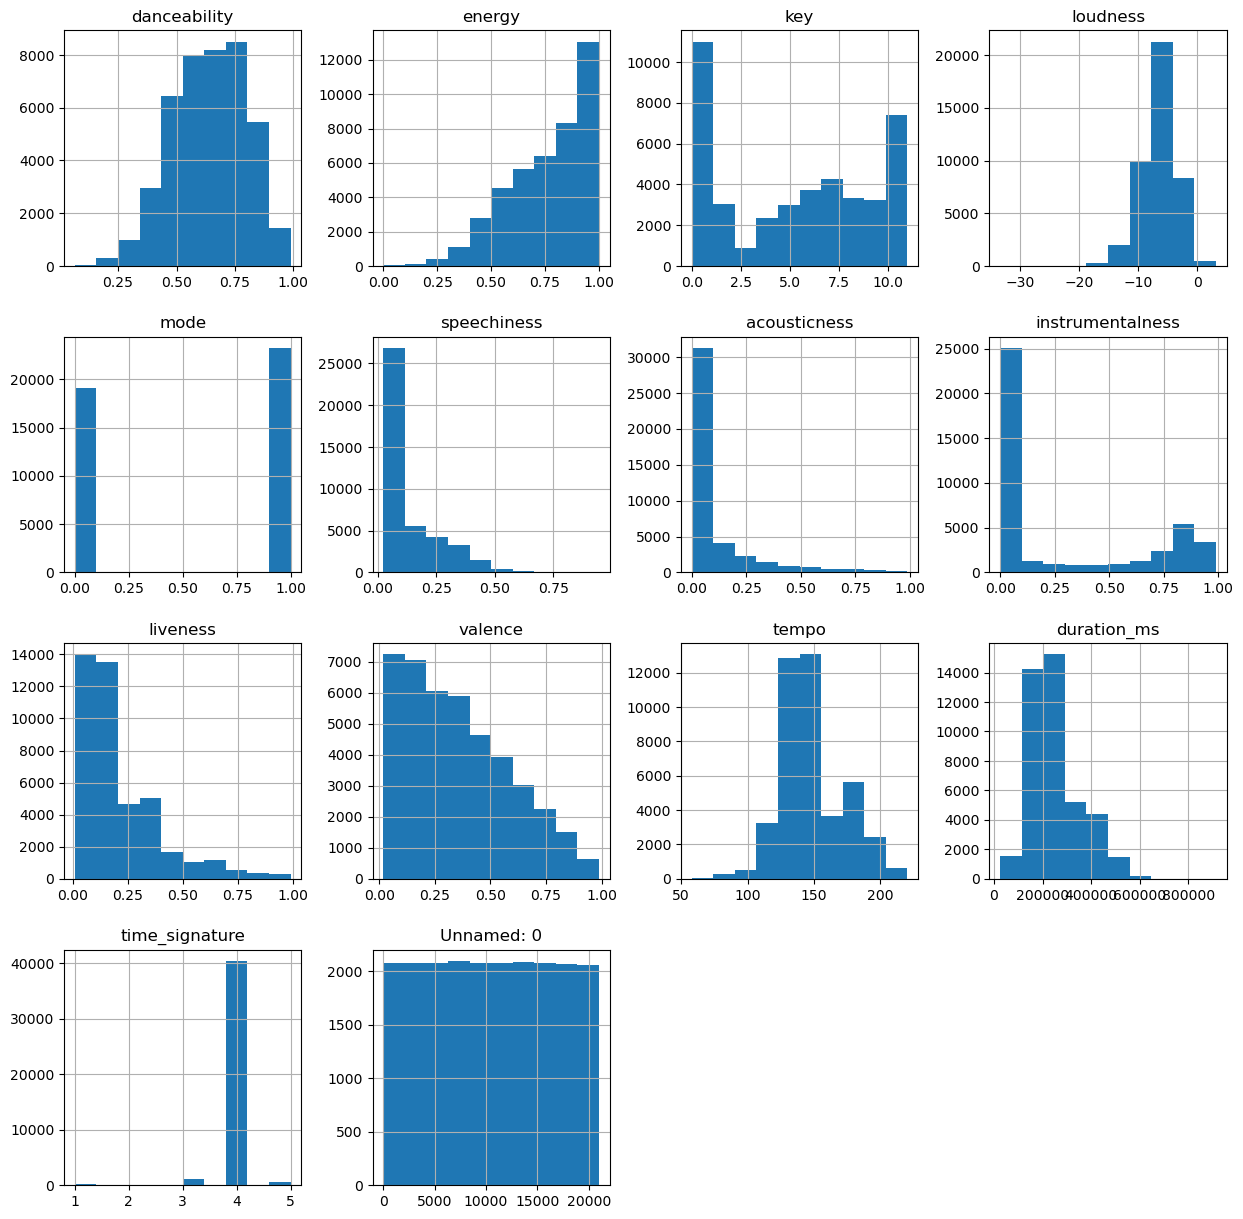

In [8]:
data.hist(figsize=(15, 15))

## Now let's perform some finer data analysis

In [9]:
attr_to_del = list(data.columns[11:])
del attr_to_del[5]
del attr_to_del[6]
attr_to_del

['type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'time_signature',
 'song_name',
 'Unnamed: 0',
 'title']

In [10]:
data_plot = deepcopy(data)
data_plot.drop(columns=attr_to_del, inplace=True)

In [11]:
data_plot.head(10)

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   
5         0.721   0.568    0   -11.295     1       0.4140        0.0452   
6         0.718   0.668    8    -4.162     1       0.1370        0.0254   
7         0.694   0.711    8    -5.525     1       0.2210        0.0397   
8         0.774   0.751    1    -2.445     1       0.1980        0.0614   
9         0.893   0.907   11   -10.406     1       0.3670        0.1520   

   instrumentalness  liveness  valence    tempo  duration_ms      genre  
0          0.013400    0.0556   0.3890  156.985       124539  Dark Trap  
1          0.000000    0.1180   0.1240  115.080       224427  Dark Trap  
2          0.000004    0.3720   0.0391  218.050        98821  Dark Trap  
3          0.000000    0.1140   0.1750  186.948       123661  Dark Trap  
4          0.000000    0.1660   0.5910  147.988       123298  Dark Trap  
5          0.212000    0.1280   0.1090  144.915       112511  Dark Trap  
6          0.007800    0.1240   0.0380  130.826        77584  Dark Trap  
7          0.000000    0.1120   0.2830  138.049       127524  Dark Trap  
8          0.000000    0.0728   0.1890  219.960       140326  Dark Trap  
9          0.031100    0.5580   0.3020  199.942       121979  Dark Trap

In [12]:
sns.set(style='ticks', context='talk')
plt.style.use("dark_background")

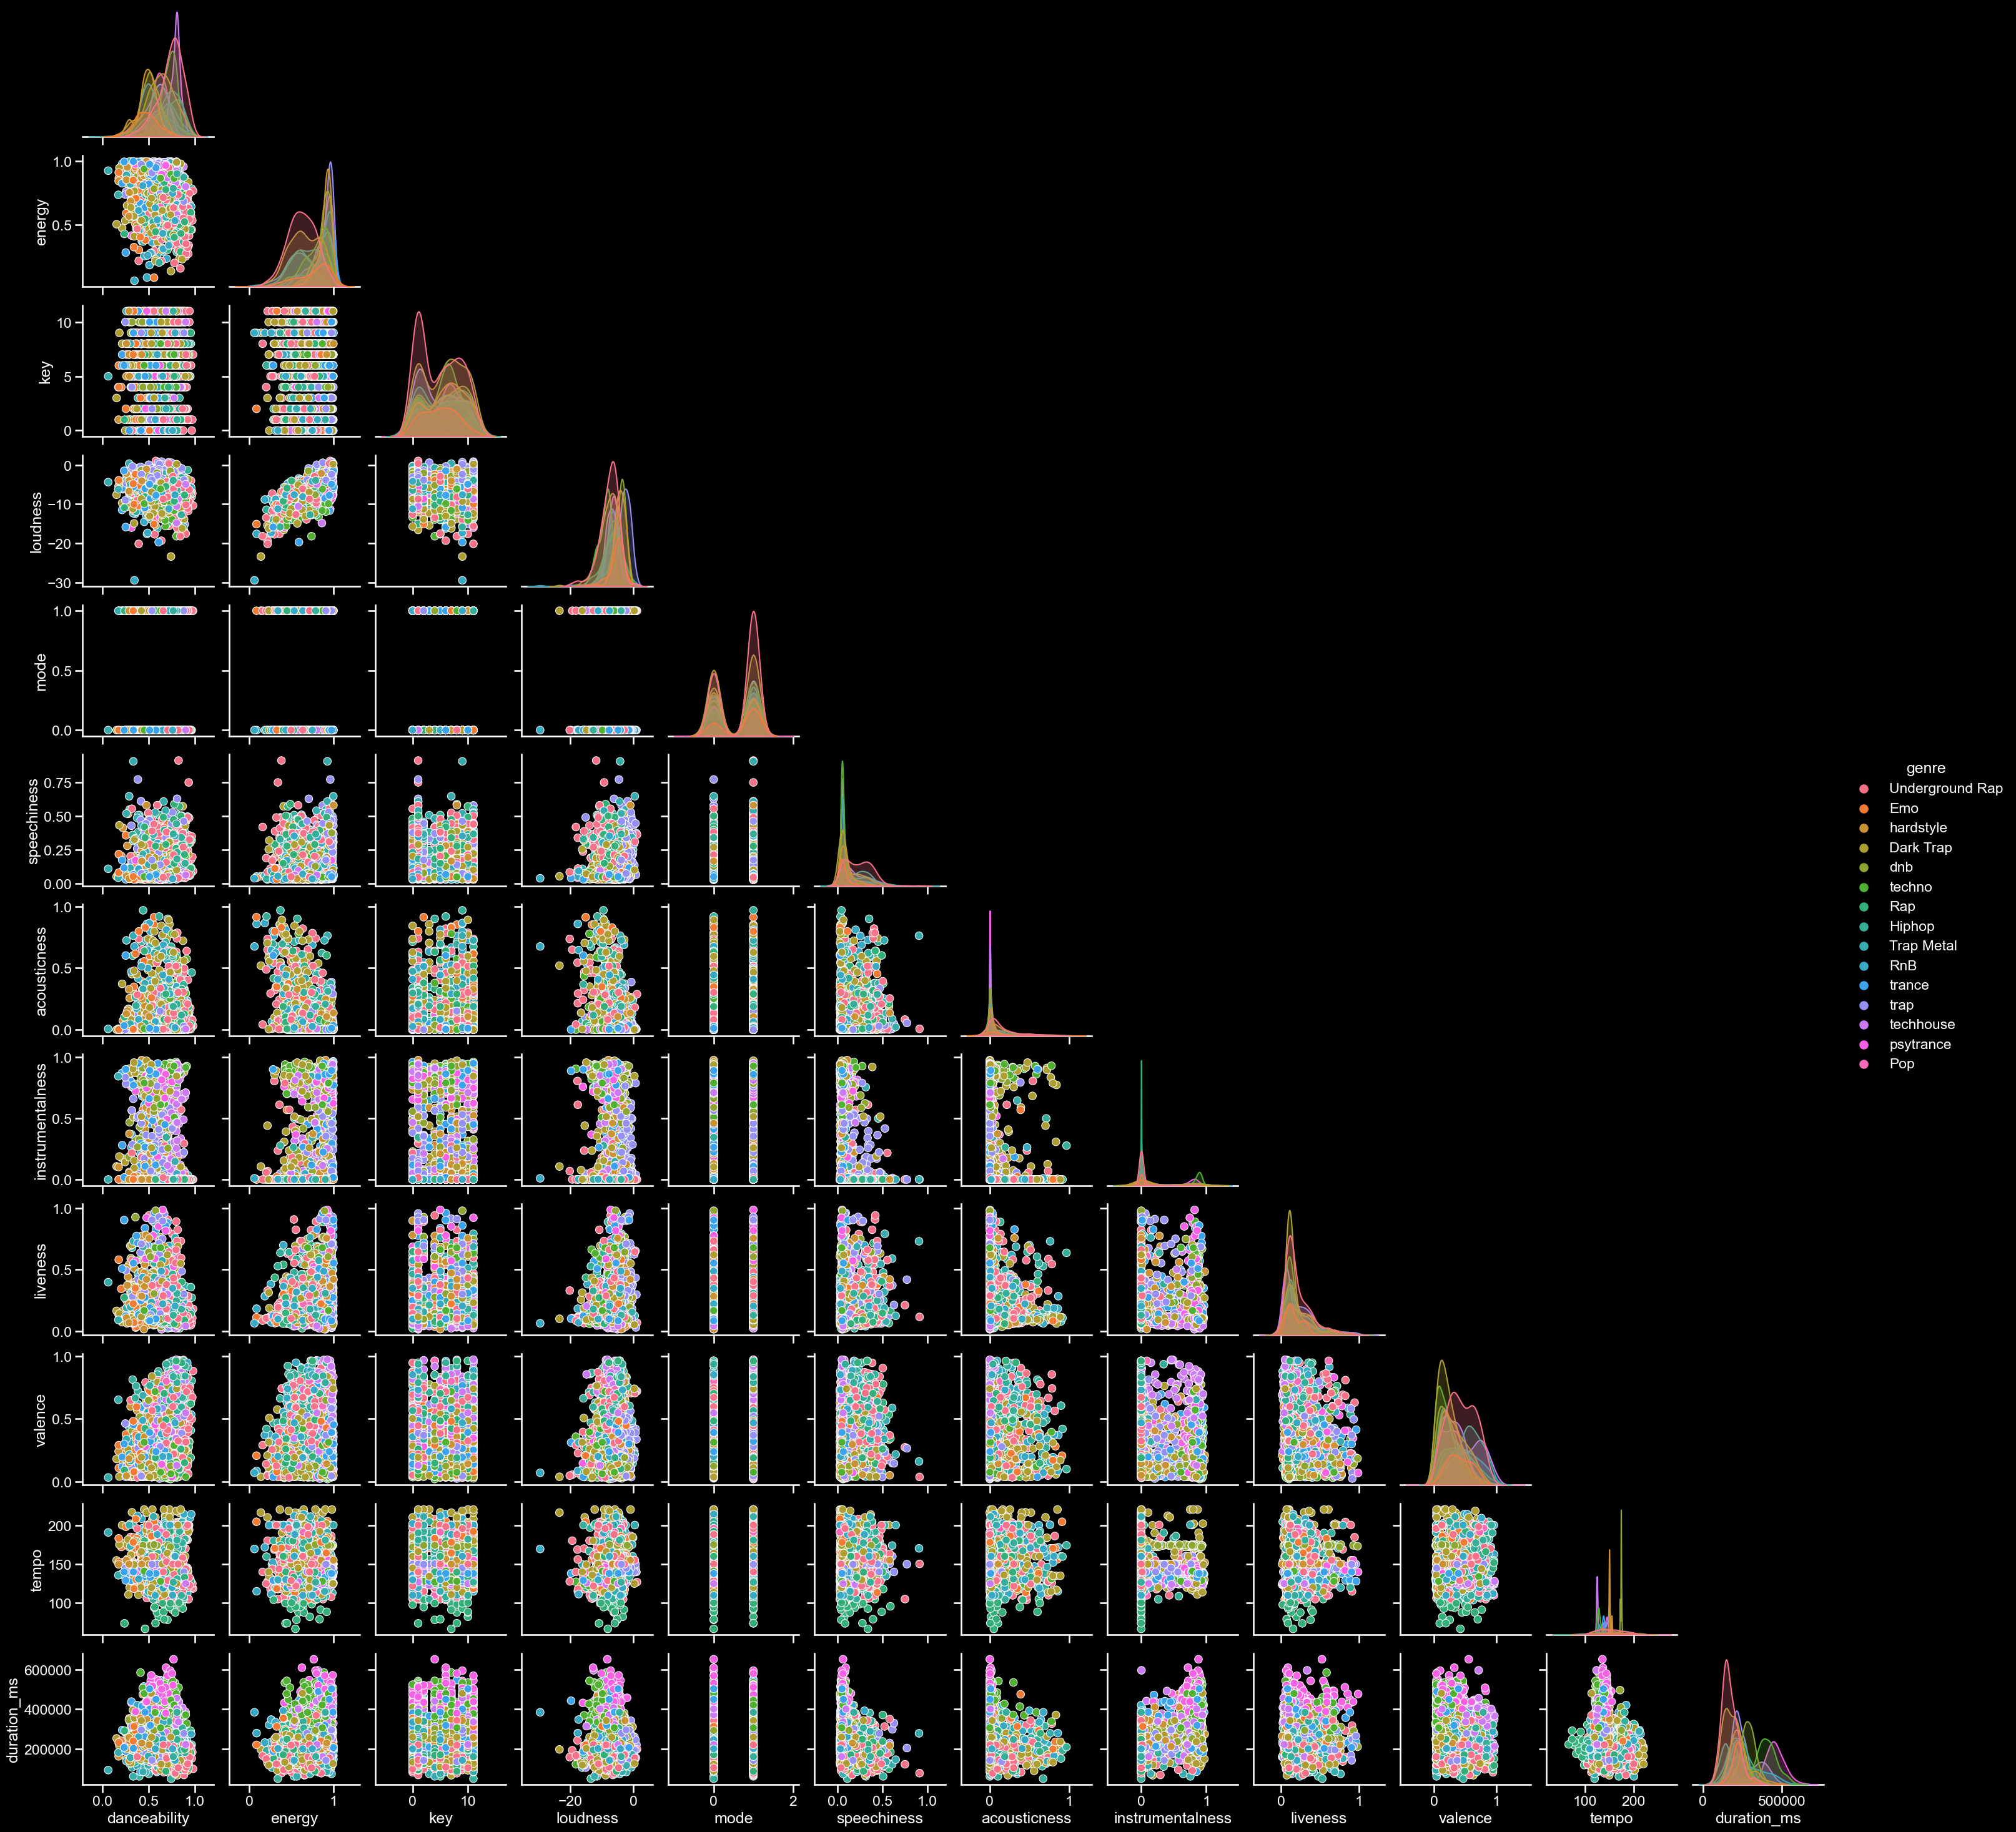

In [14]:
sns.pairplot(data_plot.sample(2000), corner=True, hue='genre')

In [15]:
px.box(data_frame=data, y='duration_ms', color='genre')

## Classic but useful: the heatmap!

In [16]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [17]:
data.corr()

danceability    energy       key  loudness      mode  \
danceability          1.000000 -0.323248 -0.012708 -0.216776  0.084413   
energy               -0.323248  1.000000  0.044731  0.601540 -0.032203   
key                  -0.012708  0.044731  1.000000 -0.006810 -0.248283   
loudness             -0.216776  0.601540 -0.006810  1.000000 -0.004744   
mode                  0.084413 -0.032203 -0.248283 -0.004744  1.000000   
speechiness           0.182177 -0.148363 -0.030634  0.048035  0.050260   
acousticness          0.069910 -0.497334 -0.004937 -0.283876 -0.014514   
instrumentalness     -0.067114  0.303875  0.068266 -0.187933 -0.016402   
liveness             -0.196702  0.231754  0.002753  0.167104  0.007280   
valence               0.369845 -0.013520  0.028600  0.080916  0.022208   
tempo                -0.165929 -0.024504 -0.009862  0.151610 -0.012191   
duration_ms          -0.049807  0.294464  0.069255 -0.095999 -0.031253   
time_signature        0.057711  0.039781  0.008061  0.047471 -0.009317   

                  speechiness  acousticness  instrumentalness  liveness  \
danceability         0.182177      0.069910         -0.067114 -0.196702   
energy              -0.148363     -0.497334          0.303875  0.231754   
key                 -0.030634     -0.004937          0.068266  0.002753   
loudness             0.048035     -0.283876         -0.187933  0.167104   
mode                 0.050260     -0.014514         -0.016402  0.007280   
speechiness          1.000000      0.160184         -0.386571  0.057432   
acousticness         0.160184      1.000000         -0.261896 -0.107229   
instrumentalness    -0.386571     -0.261896          1.000000 -0.015990   
liveness             0.057432     -0.107229         -0.015990  1.000000   
valence              0.218829      0.099328         -0.257068 -0.025156   
tempo                0.164674      0.055643         -0.207667  0.028327   
duration_ms         -0.309892     -0.246681          0.603784  0.010594   
time_signature       0.021637     -0.049791         -0.010164  0.003077   

                   valence     tempo  duration_ms  time_signature  
danceability      0.369845 -0.165929    -0.049807        0.057711  
energy           -0.013520 -0.024504     0.294464        0.039781  
key               0.028600 -0.009862     0.069255        0.008061  
loudness          0.080916  0.151610    -0.095999        0.047471  
mode              0.022208 -0.012191    -0.031253       -0.009317  
speechiness       0.218829  0.164674    -0.309892        0.021637  
acousticness      0.099328  0.055643    -0.246681       -0.049791  
instrumentalness -0.257068 -0.207667     0.603784       -0.010164  
liveness         -0.025156  0.028327     0.010594        0.003077  
valence           1.000000  0.058374    -0.191093        0.040308  
tempo             0.058374  1.000000    -0.156961       -0.019778  
duration_ms      -0.191093 -0.156961     1.000000        0.003040  
time_signature    0.040308 -0.019778     0.003040        1.000000

In [18]:
x = list(data.corr().columns)
y = list(data.corr().index)
values = np.array(data.corr().values)
fig = go.Figure(data=go.Heatmap(z=values, x=x, y=y, hoverongaps=False))
fig.show()